### Proje Amacı

Bu proje, 2015 yılına ait **World Happiness Report** (Dünya Mutluluk Raporu) verilerini inceleyerek ülkelerin mutluluk düzeylerini belirleyen faktörleri analiz etmeyi amaçlamaktadır. Veriler, **Gallup World Poll** tarafından yapılan anketler üzerinden elde edilmiştir.

Projede; ülkelerin mutluluk skorları, bu skora etki eden değişkenler (**ekonomi**, **sağlık**, **özgürlük**, **sosyal destek** vb.) ve bölgesel dağılımlar gibi çeşitli boyutlarda analizler yapılacaktır.Veriler, Gallup World Poll anketlerinden elde edilmiştir.



| Sütun Adı                         | Açıklama                                                                         |
| --------------------------------- | -------------------------------------------------------------------------------- |
| **Country**                       | Ülke adı                                                                         |
| **Region**                        | Ülkenin bulunduğu bölge (örneğin: Western Europe)                                |
| **Happiness Rank**                | Ülkenin mutluluk sıralaması (1 en yüksek)                                        |
| **Happiness Score**               | Ülkenin mutluluk skoru (0 ile 10 arasında)                                       |
| **Standard Error**                | Mutluluk skorunun ortalama hata değeri                                           |
| **Economy (GDP per Capita)**      | Kişi başı gayrisafi yurtiçi hasılanın mutluluğa katkısı                          |
| **Family**                        | Aile, sosyal destek sistemlerinin mutluluğa katkısı (örneğin birine güvenebilme) |
| **Health (Life Expectancy)**      | Sağlıklı yaşam beklentisinin katkısı                                             |
| **Freedom**                       | Hayat seçimleri konusunda özgürlük hissinin katkısı                              |
| **Trust (Government Corruption)** | Hükûmete duyulan güven, yolsuzluk algısının düşüklüğünün katkısı                 |
| **Generosity**                    | Cömertlik, başkalarına yardım etme davranışının katkısı                          |
| **Dystopia Residual**             | Modelin açıklayamadığı mutluluk bileşeni + Dystopia baz puanı (referans değer)   |


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")

missing_values = data.isnull().sum()

missing_values = missing_values[missing_values > 0]

data.head()

if missing_values.empty:
    print("✅ Veri setinde eksik (NaN) veri bulunmamaktadır.")
else:
    print("⚠️ Eksik veriler tespit edildi:")
    display(missing_values.to_frame(name='Eksik Değer Sayısı'))


✅ Veri setinde eksik (NaN) veri bulunmamaktadır.


In [ ]:
import pandas as pd
from IPython.display import display, HTML

data = pd.read_csv("data.csv")

# En mutlu ve en mutsuz 10 ülkeyi seçiyoruz
top_10 = data[['Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=False).head(10).reset_index(drop=True)
bottom_10 = data[['Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=True).head(10).reset_index(drop=True)

# HTML ile yan yana gösteriyoruz
html = f"""
<div style="display: flex; gap: 50px;">
    <div>
        <h3>📈 En Mutlu 10 Ülke</h3>
        {top_10.to_html(index=False)}
    </div>
    <div>
        <h3>📉 En Mutsuz 10 Ülke</h3>
        {bottom_10.to_html(index=False)}
    </div>
</div>
"""

display(HTML(html))


Country,Happiness Score
Switzerland,7.587
Iceland,7.561
Denmark,7.527
Norway,7.522
Canada,7.427
Finland,7.406
Netherlands,7.378
Sweden,7.364
New Zealand,7.286
Australia,7.284


###  Bölgelere Göre Dünya Mutluluk Ortalaması
Bu grafik, 2015 yılı Dünya Mutluluk Raporu verilerine göre farklı bölgelerdeki ülkelerin ortalama mutluluk skorlarını göstermektedir

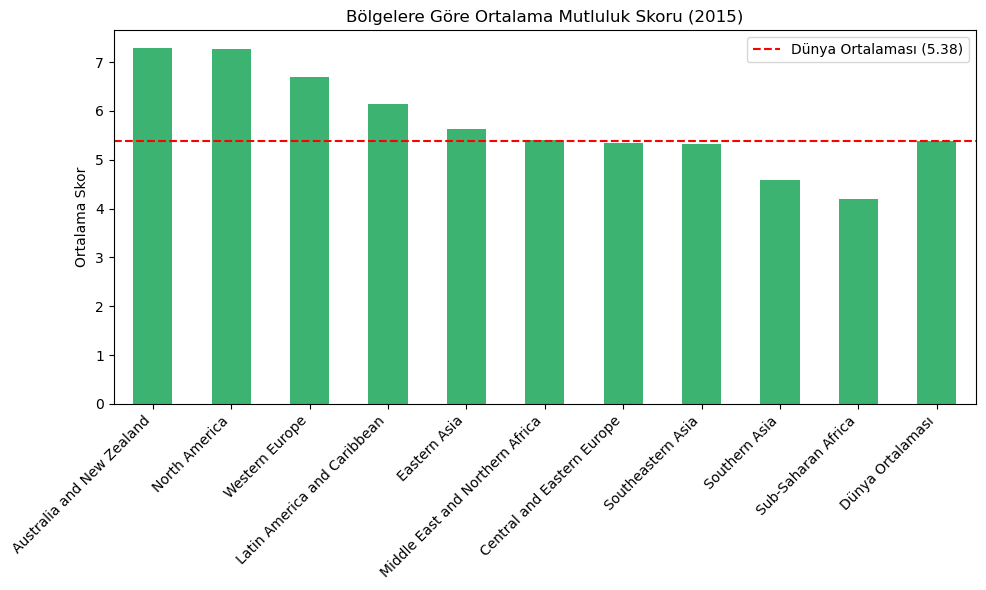

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

# Bölgelere göre ortalama mutluluk skoru
region_means = data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Dünya ortalaması
global_mean = data['Happiness Score'].mean()

# Dünya ortalamasını ekliyoruz (pd.concat kullanılarak)
region_means_with_global = pd.concat([region_means, pd.Series({'Dünya Ortalaması': global_mean})])

# Grafik çizimi
plt.figure(figsize=(10, 6))
region_means_with_global.plot(kind='bar', color='mediumseagreen')
plt.title("Bölgelere Göre Ortalama Mutluluk Skoru (2015)")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=45, ha='right')
plt.axhline(global_mean, color='red', linestyle='--', label=f"Dünya Ortalaması ({global_mean:.2f})")
plt.legend()
plt.tight_layout()
plt.show()
